# Part 1 : RTF to CSV conversion

This part 1 will show you how to get a single csv file of all the articles from Factiva you want to analyse. 
Indeed, the csv file is needed to use the text analysis tools of this Git.
The tutorial uses a dataset example called "" which is some articles related to AI Safety within the last 5 years and with 30 journals UK and US.

Run the below cell and choose the folder that contains all you rtf files from Factiva on Factiva, please choose "RTF" and then "Article Format".

The default name is 'FactivaPostProcessed.csv'

You will have a lot of warnings "A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead" but don't worry, and if you know how to improve the code with that please let me know.

To have an idea of the time of this task, it took about 5 seconds for 1500 articles on my M1 Mac.

In [1]:
from RTF_FactivaToCSV import *
FactivaFolderToCSV()

# Part 2 : Read the CSV file
Now you have a file with your csv file, let's read it.
You have to find the path to it, if you need help for that maybe find some with ChatGPT, or just know
that the easiest way is to put the csv file in the same folder as the one of this notebook and choose the name of the file as the path.

In [2]:
from FactivaToolFunctions import *
import pandas as pd
pd.options.display.max_rows = 200

path_to_the_csv_file = 'factiva_AIsafety_analysis.csv' # YOUR PATH HERE
factivadf = pd.read_csv(path_to_the_csv_file, delimiter=",")
factivadf['PD'] = pd.to_datetime(factivadf['PD']) # Converting dates to good format.

Here are the corresponding meanings of the labels:

- SE  : Subject
- HD  : Title
- BY  : Authors
- CR  : Contributors
- WC  : Number of words
- PD  : Publication date
- SN  : Source name (Journal name)
- SC  : Source code (Journal Code)
- LA  : Language
- CY  : Copyright
- NS  : Related Topics
- RE  : Region
- PUB : Publishers
- AN  : ID of document

Run the next cell to see your data.

In [3]:
factivadf

,SE,HD,BY,WC,PD,ET,SN,SC,LA,CY,LPTD,NS,RE,PUB,AN
0,Missing Data,OMB Releases Draft Guidance To Agencies On Imp...,Bruce Sokler,"1,881 words",2023-11-14,Missing Data,Mondaq Business Briefing,BBPUB,English,(c) 2023 Mondaq Ltd,Welcome to this week's issue of AI: The Washin...,Missing Data,namz : North America,City AM Ltd,Document CITONL0020231114ejbe001up
1,News,Week in review: Is hitting sustainability quot...,Laura Husband,994 words,2023-11-14,Missing Data,Just-Style,JUSTY,English,© 2023 Aroq Limited. All rights reserved,Last week UK retailer Boohoo made headlines fo...,c42 : Labor/Personnel,eurz : Europe,"Dow Jones & Company, Inc.",Document DJDN000020231114ejbe001z8
2,Missing Data,Key Provisions And Impacts Of Biden's Executiv...,Vejay Lalla,"2,927 words",2023-11-14,Missing Data,Mondaq Business Briefing,BBPUB,English,(c) 2023 Mondaq Ltd,"On October 30, 2023, the Biden administration ...",Missing Data,namz : North America,Mondaq Limited,Document BBPUB00020231114ejbe0009q
3,Missing Data,Data Blast: AI News Roundup,James Tumbridge,"1,680 words",2023-11-14,Missing Data,Mondaq Business Briefing,BBPUB,English,(c) 2023 Mondaq Ltd,29 countries sign the Bletchley Declaration on...,gaiml : Artificial Intelligence/Machine Learning,eurz : Europe,Mondaq Limited,Document BBPUB00020231114ejbe0008z
4,China,Can new UK foreign secretary David Cameron put...,Finbarr Bermingham,"1,266 words",2023-11-14,Missing Data,scmp.com,SCMCOM,English,(c) 2023 scmp.com. All rights reserved.,* Cameron’s six years as prime minister coinci...,gcat : Political/General News,namz : North America,Benzinga.com,Document BNZNGA0020231114ejbe000jw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,Technology,How the UK’s emphasis on apocalyptic AI risk...,Johana Bhuiyan,"2,074 words",2023-10-31,14:59,The Guardian,GRDN,English,© Copyright 2023. The Guardian. All rights r...,Experts say focus of the UK’s global AI summit...,gaiml : Artificial Intelligence/Machine Learning,uk : United Kingdom,Guardian Newspapers Limited,Document GRDN000020231031ejav000gu
737,Missing Data,Rishi Sunak and Elon Musk to discuss AI at ‘in...,Missing Data,270 words,2023-10-31,Missing Data,Holyrood,HLROOD,English,© 2023 Dods Parliamentary Communications Ltd. ...,following this week's global AI summit\n\nPrim...,gaiml : Artificial Intelligence/Machine Learning,Missing Data,"Dow Jones & Company, Inc.",Document J000000020231031ejav0000h
738,Missing Data,Latest market-sensitive news and views - Oct. 30,Jim Wyckoff,"3,356 words",2023-10-31,Missing Data,Kitco.com,KITCOM,English,Copyright 2023. Kitco.com,Big week for U.S. central bank action; U.S. jo...,c151 : Earnings,usa : United States,Kitco Metals Inc.,Document KITCOM0020231031ejav00007
739,GADGETS NEWS,"Explainer: Elon Musk, Sam Altman and others to...",Missing Data,577 words,2023-10-31,Missing Data,The Times of India,TOI,English,(c) 2023 The Times of India Group,Britain is set to host the world's first globa...,Missing Data,uk : United Kingdom,"Bennett, Coleman & Co., Ltd.",Document TOI0000020231031ejav000yh


# Part 3 : Filter the data.

You can filter by a period of time or by some words that you want or not to be in the articles.

In [4]:
# Example for date filter, as there is no end date, it will take all the dates after the starting one by default.

start_date = '2023-01-01'

period_filter = make_date_filter(factivadf, start_date= start_date)

df_2023_filtered = factivadf[period_filter]

In [5]:
# Run the following cell to see your filtered dataframe.
df_2023_filtered

,SE,HD,BY,WC,PD,ET,SN,SC,LA,CY,LPTD,NS,RE,PUB,AN
0,Missing Data,OMB Releases Draft Guidance To Agencies On Imp...,Bruce Sokler,"1,881 words",2023-11-14,Missing Data,Mondaq Business Briefing,BBPUB,English,(c) 2023 Mondaq Ltd,Welcome to this week's issue of AI: The Washin...,Missing Data,namz : North America,City AM Ltd,Document CITONL0020231114ejbe001up
1,News,Week in review: Is hitting sustainability quot...,Laura Husband,994 words,2023-11-14,Missing Data,Just-Style,JUSTY,English,© 2023 Aroq Limited. All rights reserved,Last week UK retailer Boohoo made headlines fo...,c42 : Labor/Personnel,eurz : Europe,"Dow Jones & Company, Inc.",Document DJDN000020231114ejbe001z8
2,Missing Data,Key Provisions And Impacts Of Biden's Executiv...,Vejay Lalla,"2,927 words",2023-11-14,Missing Data,Mondaq Business Briefing,BBPUB,English,(c) 2023 Mondaq Ltd,"On October 30, 2023, the Biden administration ...",Missing Data,namz : North America,Mondaq Limited,Document BBPUB00020231114ejbe0009q
3,Missing Data,Data Blast: AI News Roundup,James Tumbridge,"1,680 words",2023-11-14,Missing Data,Mondaq Business Briefing,BBPUB,English,(c) 2023 Mondaq Ltd,29 countries sign the Bletchley Declaration on...,gaiml : Artificial Intelligence/Machine Learning,eurz : Europe,Mondaq Limited,Document BBPUB00020231114ejbe0008z
4,China,Can new UK foreign secretary David Cameron put...,Finbarr Bermingham,"1,266 words",2023-11-14,Missing Data,scmp.com,SCMCOM,English,(c) 2023 scmp.com. All rights reserved.,* Cameron’s six years as prime minister coinci...,gcat : Political/General News,namz : North America,Benzinga.com,Document BNZNGA0020231114ejbe000jw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,Technology,How the UK’s emphasis on apocalyptic AI risk...,Johana Bhuiyan,"2,074 words",2023-10-31,14:59,The Guardian,GRDN,English,© Copyright 2023. The Guardian. All rights r...,Experts say focus of the UK’s global AI summit...,gaiml : Artificial Intelligence/Machine Learning,uk : United Kingdom,Guardian Newspapers Limited,Document GRDN000020231031ejav000gu
737,Missing Data,Rishi Sunak and Elon Musk to discuss AI at ‘in...,Missing Data,270 words,2023-10-31,Missing Data,Holyrood,HLROOD,English,© 2023 Dods Parliamentary Communications Ltd. ...,following this week's global AI summit\n\nPrim...,gaiml : Artificial Intelligence/Machine Learning,Missing Data,"Dow Jones & Company, Inc.",Document J000000020231031ejav0000h
738,Missing Data,Latest market-sensitive news and views - Oct. 30,Jim Wyckoff,"3,356 words",2023-10-31,Missing Data,Kitco.com,KITCOM,English,Copyright 2023. Kitco.com,Big week for U.S. central bank action; U.S. jo...,c151 : Earnings,usa : United States,Kitco Metals Inc.,Document KITCOM0020231031ejav00007
739,GADGETS NEWS,"Explainer: Elon Musk, Sam Altman and others to...",Missing Data,577 words,2023-10-31,Missing Data,The Times of India,TOI,English,(c) 2023 The Times of India Group,Britain is set to host the world's first globa...,Missing Data,uk : United Kingdom,"Bennett, Coleman & Co., Ltd.",Document TOI0000020231031ejav000yh


In [6]:
# Example for date filter, as there is no end date, it will take all the dates after the starting one by default.

Wanted_words = ['summit']

word_filter = make_words_filter(factivadf, words_to_match=Wanted_words)

df_words_filtered = factivadf[word_filter]

In [7]:
df_words_filtered

,SE,HD,BY,WC,PD,ET,SN,SC,LA,CY,LPTD,NS,RE,PUB,AN
0,Missing Data,OMB Releases Draft Guidance To Agencies On Imp...,Bruce Sokler,"1,881 words",2023-11-14,Missing Data,Mondaq Business Briefing,BBPUB,English,(c) 2023 Mondaq Ltd,Welcome to this week's issue of AI: The Washin...,Missing Data,namz : North America,City AM Ltd,Document CITONL0020231114ejbe001up
1,News,Week in review: Is hitting sustainability quot...,Laura Husband,994 words,2023-11-14,Missing Data,Just-Style,JUSTY,English,© 2023 Aroq Limited. All rights reserved,Last week UK retailer Boohoo made headlines fo...,c42 : Labor/Personnel,eurz : Europe,"Dow Jones & Company, Inc.",Document DJDN000020231114ejbe001z8
3,Missing Data,Data Blast: AI News Roundup,James Tumbridge,"1,680 words",2023-11-14,Missing Data,Mondaq Business Briefing,BBPUB,English,(c) 2023 Mondaq Ltd,29 countries sign the Bletchley Declaration on...,gaiml : Artificial Intelligence/Machine Learning,eurz : Europe,Mondaq Limited,Document BBPUB00020231114ejbe0008z
4,China,Can new UK foreign secretary David Cameron put...,Finbarr Bermingham,"1,266 words",2023-11-14,Missing Data,scmp.com,SCMCOM,English,(c) 2023 scmp.com. All rights reserved.,* Cameron’s six years as prime minister coinci...,gcat : Political/General News,namz : North America,Benzinga.com,Document BNZNGA0020231114ejbe000jw
5,Missing Data,MIL-OSI United Kingdom: Secretary of State spe...,Missing Data,"2,537 words",2023-11-14,Missing Data,ForeignAffairs.co.nz,PARALL,English,Copyright 2023. Multimedia Investments Ltd. ...,Source: United Kingdom - Government Statements...,c315 : Conferences/Exhibitions,eurz : Europe,Multimedia Investments Ltd,Document PARALL0020231114ejbe001bi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,World,Kamala Harris to urge AI summit to look beyo...,Tim Stickings,695 words,2023-10-31,Missing Data,The National,NATENG,English,Copyright 2023 The National,The US will urge the world to face the “full s...,gaiml : Artificial Intelligence/Machine Learning,usa : United States,Mondaq Limited,Document BBPUB00020231031ejav00105
736,Technology,How the UK’s emphasis on apocalyptic AI risk...,Johana Bhuiyan,"2,074 words",2023-10-31,14:59,The Guardian,GRDN,English,© Copyright 2023. The Guardian. All rights r...,Experts say focus of the UK’s global AI summit...,gaiml : Artificial Intelligence/Machine Learning,uk : United Kingdom,Guardian Newspapers Limited,Document GRDN000020231031ejav000gu
737,Missing Data,Rishi Sunak and Elon Musk to discuss AI at ‘in...,Missing Data,270 words,2023-10-31,Missing Data,Holyrood,HLROOD,English,© 2023 Dods Parliamentary Communications Ltd. ...,following this week's global AI summit\n\nPrim...,gaiml : Artificial Intelligence/Machine Learning,Missing Data,"Dow Jones & Company, Inc.",Document J000000020231031ejav0000h
739,GADGETS NEWS,"Explainer: Elon Musk, Sam Altman and others to...",Missing Data,577 words,2023-10-31,Missing Data,The Times of India,TOI,English,(c) 2023 The Times of India Group,Britain is set to host the world's first globa...,Missing Data,uk : United Kingdom,"Bennett, Coleman & Co., Ltd.",Document TOI0000020231031ejav000yh


# Part 4 Counting articles.

Making some filter is rarely useful in itself, so let's see different applications, the first one is to count the number of article corresponding to a certain period and containing some words and not other.

In the following example, we want to count the number of articles realted to AI Summit London.
We ban some words that might interfere with what we really want.

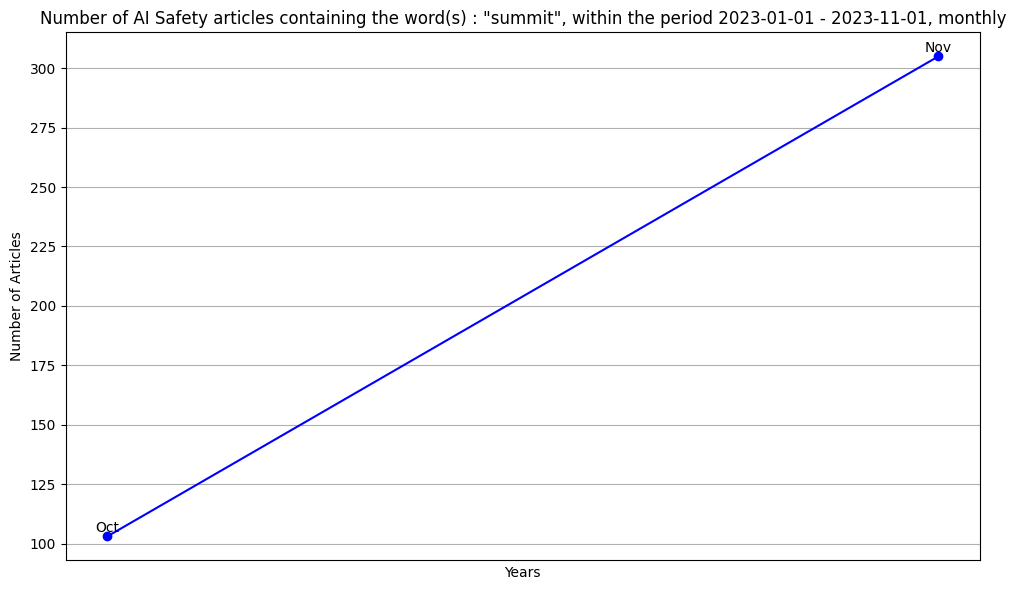

In [8]:
Wanted_words = ['summit']

Banned_words = ['gaza', 'hamas', 'israel', 'ukraine', 'zelensky', 'coronavirus', 'covid', 'wuhan']

start_date = '2023-01-01'
# The following function includes the filtering by period and words, you can also do it in a first place by yourself with the previous function of part 3
# The function includes a default plotting that shows the data, the variable Summit will contain all the articles filtered.
Summit = count_article(factivadf, start_date=start_date, words_to_match=Wanted_words, words_to_ban=Banned_words, plot=True)

# Part 5 TF-IDF

Do some TF-IDF on a subset of the articles. 
The function time_group_articles allows to group articles by months, then we can to TF-IDF where each document is all the articles during a month.

In [9]:
# You can group your prefiltered df which is Summit : 
Grouped_articles = time_group_articles(Summit, time_unity='Month')
# Or put everything directly in the function : 

Wanted_words = ['summit']
Banned_words = ['gaza', 'hamas', 'israel', 'ukraine', 'zelensky', 'coronavirus', 'covid', 'wuhan']
start_date = '2023-01-01'
Grouped_articles = time_group_articles(factivadf, start_date=start_date, words_to_match=Wanted_words, words_to_ban=Banned_words,  time_unity='Month')

In [10]:
# Run this cell to see how it looks like.
Grouped_articles

,Month,LPTD
0,10,"As the UK's AI safety summit approaches, SMEs ..."
1,11,Welcome to this week's issue of AI: The Washin...


In [11]:
# You can do that yearly.

Yearly_grouped_articles = time_group_articles(Summit, time_unity='Year')

In [12]:
# TF-IDF : 
# put 'Year' instead of Month if you have grouped your articles yearly.
TF_IDF_Factiva(Grouped_articles, index_column='Month', top_k=30)

alt.LayerChart(...)

Maybe there are too many words you find irrelevant. By default, the stopwords set is quite small, containing hundreds of words.

You can change that by downloading one more stopwords set with the following cell and change the argument in the TF-IDF.

```python
stop_words = [
    'english': 'standard set of sklearn English stopwords',
    'medium': 'a set of 1,300 English stopwords',
    'large': 'a set of 10,000 English stopwords'
]


In [13]:
# Downloading further stop_words dataset :
# Run this cell to download it, please ensure that you let the file at the same directory level as your current notebook.

import subprocess

url = "https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt"
output_file = "Large_english_stopwords.txt"
subprocess.run(["wget", url, "-O", output_file])

--2023-12-03 22:10:37--  https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6271 (6,1K) [text/plain]
Saving to: ‘Large_english_stopwords.txt’

     0K ......                                                100% 42,1M=0s

2023-12-03 22:10:37 (42,1 MB/s) - ‘Large_english_stopwords.txt’ saved [6271/6271]



CompletedProcess(args=['wget', 'https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt', '-O', 'Large_english_stopwords.txt'], returncode=0)

In [14]:
# Now you can you use your new stopwords set and see what it yields for a TF-IDF on the same corpus as before.
stopwords_path = 'Large_english_stopwords.txt'
TF_IDF_Factiva(Grouped_articles, index_column='Month', top_k=35, stop_words=stopwords_path)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


alt.LayerChart(...)

In [15]:
# By doing that TF-IDf you might have seen some words you find relevant, you can highlight them easily to have better figures this way : 
relevant_words = ['risks', 'threat', 'existential', 'regulation', 'altruism']
TF_IDF_Factiva(Grouped_articles, index_column='Month', top_k=35, stop_words=stopwords_path, red_dotted_terms=relevant_words)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


alt.LayerChart(...)

# Part 6 Topic Modeling

More precisely we will use Latent Dirichlet Allocation method.

You just have to choose the number of topics, the stop words used and also the number of words per topic (top_k)

In [16]:
LDA_Topic_Modeling(factivadf, n_topics=6, stop_words=stopwords_path, top_k=25)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


alt.LayerChart(...)

In [17]:
# Finally you can also highlight some relevant words as we've done with the TF-IDF :
LDA_Topic_Modeling(factivadf, n_topics=6, stop_words=stopwords_path, top_k=25, red_dotted_terms=relevant_words)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


alt.LayerChart(...)